In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"




# Combine the data into a single dataset

# Display the data table for preview


In [2]:
# Read the City and Ride Data

city_pd = pd.read_csv(city_data_to_load)

ride_pd = pd.read_csv(ride_data_to_load)

mergedcityandride_pd = pd.merge(city_pd, ride_pd, on="city", how = "outer")

mergedcityandride_pd.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
group_by_city = mergedcityandride_pd.groupby("city")

In [4]:
avg_fare_per_city = group_by_city["fare"].mean()

avg_fare_per_city.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [5]:
total_rides_per_city = group_by_city["ride_id"].count()

total_rides_per_city.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [6]:
total_drivers_per_city = group_by_city["driver_count"].mean()

In [7]:
city_type = group_by_city["type"].unique()

In [8]:
city_wise_data = pd.DataFrame({"City Type": city_type,"Average Fare per City":avg_fare_per_city, "Total Rides per City":total_rides_per_city, "Total Drivers per City":total_drivers_per_city})

city_wise_data.head()

,City Type,Average Fare per City,Total Rides per City,Total Drivers per City
city,,,,
Amandaburgh,[Urban],24.641667,18,12
Barajasview,[Urban],25.332273,22,26
Barronchester,[Suburban],36.422500,16,11
Bethanyland,[Suburban],32.956111,18,22
Bradshawfurt,[Rural],40.064000,10,7


## Bubble Plot of Ride Sharing Data

In [ ]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
# Obtain the x and y coordinates for each of the three city types

In [44]:
rural = mergedcityandride_pd[mergedcityandride_pd["type"] == 'Rural']
suburban = mergedcityandride_pd[mergedcityandride_pd["type"] == 'Suburban']
urban = mergedcityandride_pd[mergedcityandride_pd["type"] == 'Urban']

In [62]:
#Calculation for Urban cities
urban_avg_fare = urban.groupby(['city'])['fare'].mean()
urban_total_rides = urban.groupby(['city']).count()['ride_id']
urban_total_drivers = urban.groupby(['city'])['driver_count'].mean()


In [63]:
#Calculation for Suburban cities
suburban_avg_fare = suburban.groupby(['city'])['fare'].mean()
suburban_total_rides = suburban.groupby(['city']).count()['ride_id']
suburban_total_drivers = suburban.groupby(['city'])['driver_count'].mean()


In [64]:
#Calculation for Rural Towns
rural_avg_fare = rural.groupby(['city'])['fare'].mean()
rural_total_rides = rural.groupby(['city']).count()['ride_id']
rural_total_drivers = rural.groupby(['city'])['driver_count'].mean()


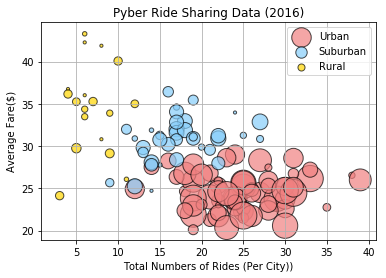

In [105]:
plt.scatter(urban_total_rides, urban_avg_fare,s=urban_total_drivers*10,
            marker ='o', color ="#F08080", edgecolors='black', alpha = .7, label="Urban")

plt.scatter(suburban_total_rides, suburban_avg_fare,s=suburban_total_drivers*10,
            marker ='o', color ="#87CEFA", edgecolors='black', alpha = .7, label="Suburban")


plt.scatter(rural_total_rides, rural_avg_fare,s=rural_total_drivers*10,
            marker ='o', color ="#FFD700", edgecolors='black', alpha = .7, label="Rural")



plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")
# legend 
plt.legend(loc='best')
plt.grid()
plt.savefig("Images/RideSharingData.png")
plt.show()



## Total Fares by City Type

In [81]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [82]:
group_by_citytype = mergedcityandride_pd.groupby("type")

In [83]:
# Calculate Type Percents

total_fare_per_citytype = group_by_citytype["fare"].sum()
fare_per_citytype = pd.DataFrame({"Fare Per City Type": total_fare_per_citytype})

fare_per_citytype 

,Fare Per City Type
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [84]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ['#FFD700', '#87CEFA', '#F08080']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

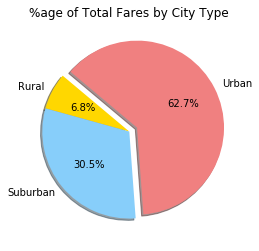

In [85]:
plt.pie(fare_per_citytype["Fare Per City Type"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("%age of Total Fares by City Type")

plt.savefig("Images/TotalFaresByCityType.png")
plt.show()



In [86]:
# Show Figure
plt.show()

## Total Rides by City Type

In [87]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [88]:
total_rides_per_citytype = group_by_citytype["ride_id"].count()
rides_per_citytype = pd.DataFrame({"Rides Per City Type": total_rides_per_citytype})

rides_per_citytype

,Rides Per City Type
type,
Rural,125
Suburban,625
Urban,1625


In [89]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ['#FFD700', '#87CEFA', '#F08080']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

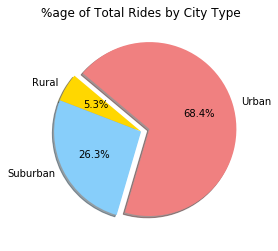

In [90]:
plt.pie(rides_per_citytype["Rides Per City Type"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("%age of Total Rides by City Type")

plt.savefig("Images/TotalRidesByCityType.png")

plt.show()




In [91]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [92]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [93]:
total_drivers_per_citytype = group_by_citytype["driver_count"].mean()
drivers_per_citytype = pd.DataFrame({"Drivers Per City Type": total_drivers_per_citytype})

drivers_per_citytype

,Drivers Per City Type
type,
Rural,4.296000
Suburban,13.712000
Urban,36.678154


In [94]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ['#FFD700', '#87CEFA', '#F08080']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

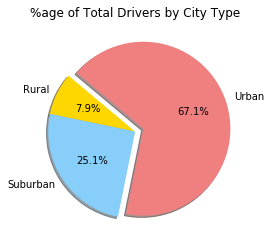

In [95]:
plt.pie(drivers_per_citytype["Drivers Per City Type"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("%age of Total Drivers by City Type")

plt.savefig("Images/TotalDriversByCityType.png")



In [ ]:
# Show Figure
plt.show()